In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [21]:
metro_pd = pd.read_csv('../CoVID-19_Dashboard_Data.csv')

In [22]:
type(metro_pd.Date[0])

str

In [23]:
metro_pd.Date = pd.to_datetime(metro_pd.Date)

In [24]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
a = metro_pd.set_index('Date')

In [26]:
a.index

DatetimeIndex(['2020-02-12 06:00:00', '2020-02-13 06:00:00',
               '2020-02-14 06:00:00', '2020-02-15 06:00:00',
               '2020-02-16 06:00:00', '2020-02-17 06:00:00',
               '2020-02-18 06:00:00', '2020-02-19 06:00:00',
               '2020-02-20 06:00:00', '2020-02-21 06:00:00',
               ...
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='Date', length=178, freq=None)

In [27]:
b = a.loc[a.index.dropna()]

In [28]:
b

,ObjectId,ReportedOn,ReportedCum,Deceased,Recovered,Hospitalized,ICU,Vent,StillIll,PosPatients,...,BCLabTests,BCTestNegative,BCTestPositive,BCTestInc,DBCLabTests,DBCTestNegative,DBCTestPositive,DBCTestInc,WeekQuar,EverQuar
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-12 06:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 06:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 06:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-15 06:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16 06:00:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-13 05:00:00,153,565.0,20213.0,11.0,7886.0,958.0,338.0,145.0,12132.0,1267.0,...,180696.0,156440.0,24092.0,164.0,1905.0,1485.0,420.0,1.0,NaN,NaN
2020-07-14 05:00:00,154,854.0,21067.0,6.0,7895.0,958.0,338.0,145.0,12971.0,1237.0,...,183139.0,158382.0,24590.0,167.0,2443.0,1945.0,498.0,3.0,NaN,NaN
2020-07-15 05:00:00,155,479.0,21546.0,7.0,7968.0,958.0,338.0,145.0,13370.0,1231.0,...,185931.0,160461.0,25302.0,168.0,2792.0,2080.0,712.0,1.0,NaN,NaN


In [29]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
c = b['PosPatients'].dropna()

In [31]:
type(c.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
c_7day_moving= c.rolling(7).mean().shift()

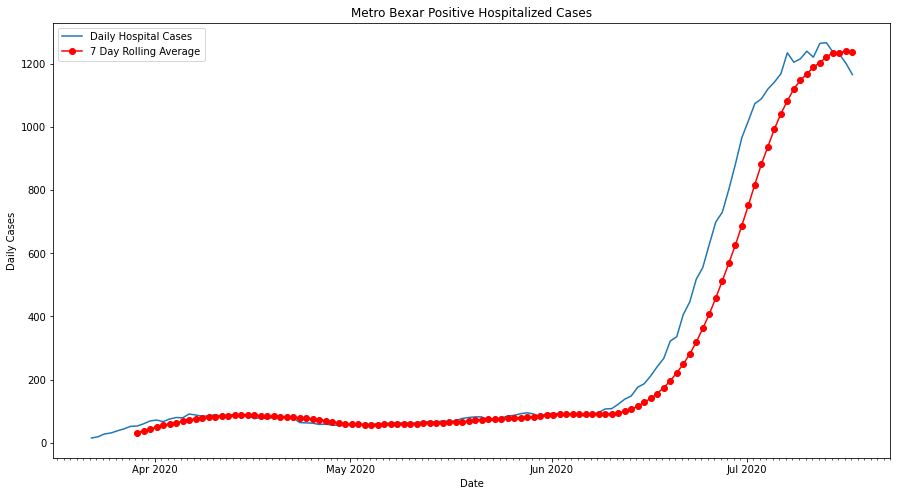

In [33]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Daily Cases',color='black')
plt.title('Metro Bexar Positive Hospitalized Cases')
#plt.bar(c.index,c)
plt.plot(c)
plt.plot(c_7day_moving,'ro-')
plt.legend(['Daily Hospital Cases','7 Day Rolling Average'])
fig.savefig('MetroPosHospitalized.png')

In [34]:
c

Date
2020-03-22 06:00:00      15.0
2020-03-23 06:00:00      19.0
2020-03-24 06:00:00      28.0
2020-03-25 06:00:00      31.0
2020-03-26 06:00:00      38.0
                        ...  
2020-07-13 05:00:00    1267.0
2020-07-14 05:00:00    1237.0
2020-07-15 05:00:00    1231.0
2020-07-16 05:00:00    1202.0
2020-07-17 05:00:00    1166.0
Name: PosPatients, Length: 118, dtype: float64

In [35]:
x = c.diff(periods = 1)

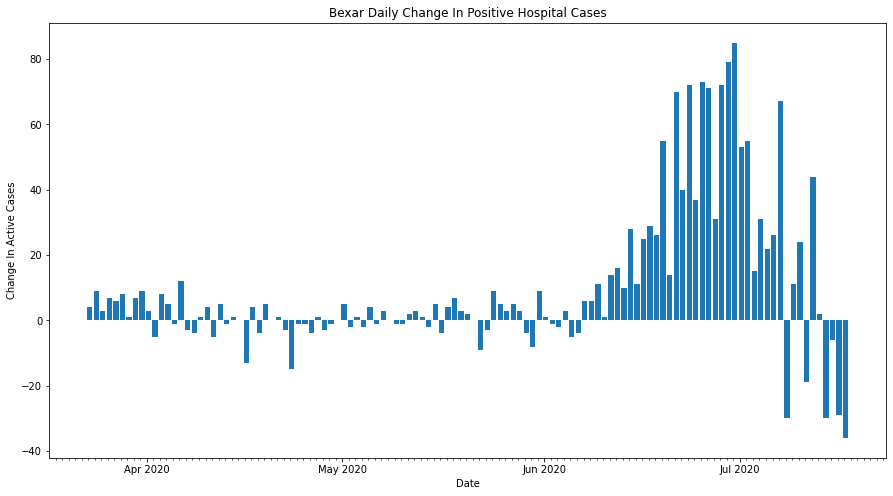

In [36]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Change In Active Cases',color='black')
plt.title('Bexar Daily Change In Positive Hospital Cases')
plt.bar(x.index,x)
fig.savefig('BexarChangeInPosHospitalCases.png')

In [37]:
x

Date
2020-03-22 06:00:00     NaN
2020-03-23 06:00:00     4.0
2020-03-24 06:00:00     9.0
2020-03-25 06:00:00     3.0
2020-03-26 06:00:00     7.0
                       ... 
2020-07-13 05:00:00     2.0
2020-07-14 05:00:00   -30.0
2020-07-15 05:00:00    -6.0
2020-07-16 05:00:00   -29.0
2020-07-17 05:00:00   -36.0
Name: PosPatients, Length: 118, dtype: float64